# Python 101 For Analytics

### Xiangshi Yin
<br/>
Email: xiangshiyin@gmail.com
<br/>
LinkedIn: https://www.linkedin.com/in/xiangshiyin/

<br/>
<br/>

#### 3/2/2019




![title](../pics/copyright.png)

## Content

* What is Python??
* Python basics
    * Data structure
    * Pandas dataframe
    * Function and Class definition
    * Package manager and environments
* File Input/Ouput
* Database connection
* Web data crawling
* Data visualization
* Model fitting

## 0. What is Python??

### 0.1. In brief

* High-level programming language for general-purpose programming
* Supports multiple programming paradigms
    * Object-oriented
    * Functional
    * ...
* Easy interface with other languages, such as C++/Java
* A large and comprehensive standard library
* Not so fast though …

![title](../pics/history.png)

### 0.2. The eco-system

![title](../pics/ecosystem.png)

### 0.3. Python 2 vs. Python 3

In [1]:
from IPython.display import IFrame
IFrame('https://pythonclock.org/', width=700, height=200)

### 0.4. IDE
(picture source: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

* Jupyter Notebook/Jupyter Lab(beta)
![title](../pics/jupyternotebook.gif)

* Visual Studio Code
(picture source: https://code.visualstudio.com/docs/python/editing)
![title](../pics/vscode.gif)
* PyCharm
* Spyder
* Atom
* ...

### 0.5. Prerequisite

In order to run the following code
* Anaconda (recommended) (https://www.anaconda.com/distribution/)
* Library list included (requirements.txt)

In order to run the notebook in presentation mode
* RISE extension to jupyter notebook (https://github.com/damianavila/RISE)

## 1. Python Basics

### 1.1 Data structures

* Variable definition

In [2]:
a = 123
print(a)

123


* Iterables:

In [3]:
# list
a = [1, 'a', 3]
a

[1, 'a', 3]

In [4]:
a[0]

1

In [5]:
a.append(4) ## append values to the list
a.extend([5,6])
a

[1, 'a', 3, 4, 5, 6]

In [6]:
# Set
a = {1,2,3}
b = {2,3,4}
print(a)
print(b)

{1, 2, 3}
{2, 3, 4}


In [7]:
a.update([5,6,7]) ## append values
a

{1, 2, 3, 5, 6, 7}

In [8]:
a - b

{1, 5, 6, 7}

In [9]:
b - a

{4}

In [10]:
a&b ## intersection

{2, 3}

In [11]:
a|b ## union

{1, 2, 3, 4, 5, 6, 7}

In [12]:
# Dictionary

x = {'a':1,'b':[2,3,4],'c':{'d':[1,2,3]}}

In [13]:
x['a']

1

In [14]:
x['c']['d']

[1, 2, 3]

In [15]:
x['e'] = 5 ## add new entry
x

{'a': 1, 'b': [2, 3, 4], 'c': {'d': [1, 2, 3]}, 'e': 5}

* Pandas dataframe

In [16]:
import pandas as pd ## import the pandas library

# show complete dataframe content
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)

In [17]:
df = pd.DataFrame({'name':['ABC','DEF','GHI','JKL'],'age':[20,30,40,50]}) # create from a dictionary
df

,name,age
0,ABC,20
1,DEF,30
2,GHI,40
3,JKL,50


In [18]:
names = ['ABC','DEF','GHI','JKL']
ages = [20,30,40,50]
df = pd.DataFrame(zip(names,ages), columns=['name','ages'])
df

,name,ages
0,ABC,20
1,DEF,30
2,GHI,40
3,JKL,50


In [19]:
df.loc[[0,2],'name'] # slice by column name

0    ABC
2    GHI
Name: name, dtype: object

In [20]:
df.iloc[:,0] # slice by column index

0    ABC
1    DEF
2    GHI
3    JKL
Name: name, dtype: object

In [21]:
df.loc[df.name=='ABC'] # slice by condition

,name,ages
0,ABC,20


In [22]:
df.describe()

,ages
count,4.000000
mean,35.000000
std,12.909944
min,20.000000
25%,27.500000
50%,35.000000
75%,42.500000
max,50.000000


In [23]:
df2 = pd.DataFrame({'name':['DEF','GHI','JKL'], 'hometown':['Atlanta, GA', 'Atlanta, GA', 'Knoxville, TN']})
df2

,name,hometown
0,DEF,"Atlanta, GA"
1,GHI,"Atlanta, GA"
2,JKL,"Knoxville, TN"


In [24]:
df_combo = pd.concat([df,df2],axis=0,sort=False) # stack two dataframes
df_combo

,name,ages,hometown
0,ABC,20.0,NaN
1,DEF,30.0,NaN
2,GHI,40.0,NaN
3,JKL,50.0,NaN
0,DEF,NaN,"Atlanta, GA"
1,GHI,NaN,"Atlanta, GA"
2,JKL,NaN,"Knoxville, TN"


In [25]:
df_combo = pd.merge( # join dataframes
    df,
    df2,
    on='name',
    how='left'
) ## Other tools are available to do sql like operation on dataframe (https://pypi.org/project/pandasql/)
df_combo

,name,ages,hometown
0,ABC,20,NaN
1,DEF,30,"Atlanta, GA"
2,GHI,40,"Atlanta, GA"
3,JKL,50,"Knoxville, TN"


In [26]:
df_combo

,name,ages,hometown
0,ABC,20,NaN
1,DEF,30,"Atlanta, GA"
2,GHI,40,"Atlanta, GA"
3,JKL,50,"Knoxville, TN"


In [27]:
df_combo.groupby('hometown').size().reset_index() # simple statistics

,hometown,0
0,"Atlanta, GA",2
1,"Knoxville, TN",1


In [28]:
df_combo.groupby(['name','hometown']).size().reset_index().rename(columns={0:'frequency'})

,name,hometown,frequency
0,DEF,"Atlanta, GA",1
1,GHI,"Atlanta, GA",1
2,JKL,"Knoxville, TN",1


In [29]:
df_combo['num_pets'] = [1,2,2,3] # create a pivot table
df_combo.pivot_table(
    index='name',
    columns='hometown',
    values='num_pets',
    aggfunc='sum'
).fillna(0)

hometown,"Atlanta, GA","Knoxville, TN"
name,,
DEF,2.0,0.0
GHI,2.0,0.0
JKL,0.0,3.0


* Function definition

        Regular function

In [30]:
def helloworld(name):
    print('My name is {}'.format(name))
    # print('My name is %s' % name)

helloworld('Bot')

My name is Bot


        Lambda function

In [31]:
helloworld2 = lambda name: print('My name is {}'.format(name))
helloworld2('Robot')

My name is Robot


* Class definition

In [32]:
class table(object):
    """
    Input table dimensions, calculate table properties    
    Parameters
    ----------
    length: int, table length
    width: int, table width
    height: int, table height
    """
    WHOAMI = 'A table'
    def __init__(self, length, width, height):
        self.length = length
        self.width = width
        self.height = height
    def toparea(self):
        return(self.length * self.width)

In [33]:
tb = table(2,3,4)
tb = table(length=2, width=3, height=4)
print(tb.WHOAMI)
print(tb.length, tb.width, tb.height)
print(tb.toparea())

A table
2 3 4
6


* Value assignment

In [34]:
a = 6
a

6

In [35]:
b = a # creat a new copy
b

6

In [36]:
a = [1,2,3]
b = a.copy() # create a reference
b

[1, 2, 3]

In [37]:
a[1] = 4
b

[1, 2, 3]

In [38]:
table_a = table(2,3,4)
table_b = table_a # create a reference
table_a.length = 5
table_b.length

5

### 1.2. Control statement

* Loop

In [39]:
for i in range(2): # i could be 0-2
    print(i)

0
1


In [40]:
i = 0
while i<3:
    i+=1
print(i)

3


In [41]:
## a better visualization!!
## (once you have pip, you can install by doing pip install tqdm)
## the github repo: https://github.com/tqdm/tqdm
from tqdm import trange
import time

a = 0
for i in trange(100):
    time.sleep(0.1)
    a = a + 1
print(a)

100%|██████████| 100/100 [00:10<00:00,  9.75it/s]

100


* Condition structure

In [42]:
values = [1,2,3,4]
for value in values:
    if value%2==0:
        print(value)

2
4


In [43]:
x = 5
output = 1 if x<3 else 0 ## conditional value assignment
output

0

In [44]:
## combination of loop and condition
output = [
    i
    for i in trange(10) if i%2==0
] # list comprehension
output

100%|██████████| 10/10 [00:00<00:00, 27112.50it/s]


[0, 2, 4, 6, 8]

### 1.3. Package manager

* pip (example)
* conda

### 1.4. Virtual Environment
* virtualenv (example)
* conda

## 2. File Input/Output

* Read a file
    * President Trump's inauguration speech (2017)

In [45]:
with open('../data/trump_inauguration.txt','r') as f:
    for index,line in enumerate(f.readlines()):
        if index<4:
            print(line)

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you.



We, the citizens of America, are now joined in a great national effort to rebuild our country and to restore its promise for all of our people.





* Write to a file
    * Example: Count word frequency and write result to a text file

In [46]:
## count the word frequency
dict_freq = {}

with open('../data/trump_inauguration.txt','r') as f:
    for line in f.readlines():
        words = line.lower().split()
        for word in words:
            word2 = word.strip('"').strip("'").replace(',','').replace('.','').replace(';','').replace('–','')
            if len(word2)>0:
                if dict_freq.get(word2,-10000)==-10000:
                    dict_freq[word2]=1
                else:
                    dict_freq[word2]=dict_freq[word2]+1

In [47]:
## write to txt file
with open('../data/word_count_out.csv','w') as f:
    for key,value in dict_freq.items():
        f.write('{word},{freq}\n'.format(word=key,freq=value))

In [48]:
## check the file content
import subprocess
result = subprocess.check_output('head -5 ../data/word_count_out.csv',shell=True).decode('utf-8')
print(result)

chief,1
justice,1
roberts,1
president,5
carter,1



* File analysis with Pandas dataframe
    * Example: Find the most frequent words

In [49]:
import pandas as pd
df = pd.read_csv('../data/word_count_out.csv',sep=',',header=None,names=['word','freq'])
df.head(3)

,word,freq
0,chief,1
1,justice,1
2,roberts,1


In [50]:
from sklearn.feature_extraction import stop_words
df2 = df.loc[~df.word.isin(
    stop_words.ENGLISH_STOP_WORDS
)]

In [51]:
df2.sort_values(by='freq',ascending=False).head(10)

,word,freq
19,america,17
101,american,12
31,country,9
11,people,9
25,great,6
315,new,6
171,nation,6
41,world,5
3,president,5
142,right,5


## 3. Database Connection

* Common tools
    * pyodbc
    * sqlalchemy
    * ...
* MySQL example
    * library: mysqlclient (https://pypi.org/project/mysqlclient/)

    ![title](../pics/mysql_query.png)

In [53]:
import MySQLdb
import pandas as pd

# create the database connection
db = MySQLdb.connect(host="localhost",
                     user="test123",
                     passwd="1234")
# query database, get output as a dataframe
df = pd.read_sql('select * from adhoc.word_count',db)
df.head(3)

,word,freq
0,2017,1
1,20th,1
2,a,15


In [54]:
## another way
# create a cursor to execute query
cur = db.cursor()
cur.execute("select * from adhoc.word_count")
result = list(cur.fetchall())
df = pd.DataFrame(result,columns=['word','freq'])
df.sort_values(by='freq',ascending=False).head(10)
# remove the stop words
from sklearn.feature_extraction import stop_words
df2 = df.loc[~df.word.isin(
    stop_words.ENGLISH_STOP_WORDS
)]
df2.sort_values(by='freq',ascending=False).head(10)

,word,freq
20,america,17
21,american,12
353,people,9
106,country,9
209,great,6
320,new,6
312,nation,6
362,president,5
287,make,5
142,dreams,5


## 4. Webpage crawling

* Common tools
    * requests, beautifulsoup, etc.
    * regex match (re)
* Example (www.advantage.com, grab all car rental location information)


In [55]:
from IPython.display import IFrame
IFrame("https://www.advantage.com/us-location/", width=1400, height=700)

![title](../pics/html_locations.png)

In [56]:
import urllib
import re

base = 'https://www.advantage.com/us-location/'
res = urllib.request.urlopen(base)
html = res.read().decode('utf-8')

In [57]:
## step 1: get all car rental locations
airports = re.findall(
    'fa fa\-map\-marker" aria\-hidden="true"></i>\s*?<p>(.*?)</p>',
    html
)
airports[:5]

['Phoenix Skyharbor Intl Airport',
 'Los Angeles International Airport',
 'San Diego International Airport',
 'San Francisco International Airport',
 'Sacramento International Airport']

![title](../pics/html_locations.png)

In [58]:
## step 2: get all page links for car rental locations
paths = re.findall(
    'href="?(.*)"\s*class="aez-icon-location"',
    html
)
paths[:5]

['/location/phoenix-sky-harbor-airport-phx',
 '/location/los-angeles-intl-airport-lax',
 '/location/san-diego-intl-airport-san',
 '/location/san-francisco-airport-sfo',
 '/location/sacramento-intl-airport-smf']

![title](../pics/html_address.png)

In [59]:
## step 3: get the address
paths_full = [
    base + path.split('/')[-1]
    for path in paths
]
paths_full[:3]

['https://www.advantage.com/us-location/phoenix-sky-harbor-airport-phx',
 'https://www.advantage.com/us-location/los-angeles-intl-airport-lax',
 'https://www.advantage.com/us-location/san-diego-intl-airport-san']

In [60]:
path2search = 'https://www.advantage.com/us-location/phoenix-sky-harbor-airport-phx'
html = urllib.request.urlopen(path2search).read().decode('utf-8')
address = re.findall('Address:</h4>\s*<p class="aez\-info\-text">(.*?)<br>(.*?)<br>',html)
address

[('1805 East Sky Harbor Circle S', 'Phoenix AZ 85034 US')]

## 5. Data Visualization

* Common tools:
    * Matplotlib
    * Seaborn
    * ggplot
    * plotly
    * ...
    ![title](../pics/pyplot.png)

* 5.1. X-Y plot

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
x = np.arange(0,10,0.1)
y = np.sin(x)
plt.plot(x,y,linestyle='--',color='blue')
plt.show()

<Figure size 500x300 with 1 Axes>

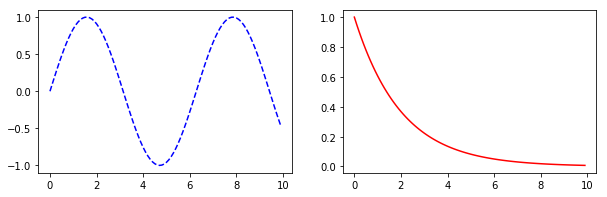

In [62]:
plt.figure(figsize=(10,3))
y2 = np.exp(-x/2)
plt.subplot(1,2,1)
plt.plot(x,y,linestyle='--',color='blue')
plt.subplot(1,2,2)
plt.plot(x,y2,linestyle='-',color='red')
plt.show()

* 5.2. Bar chart

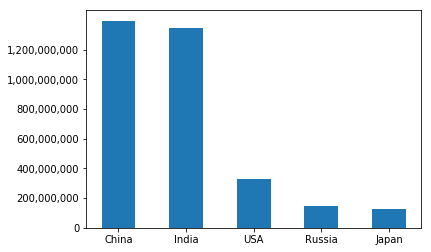

In [63]:
x = ['China','India','USA','Russia','Japan']
y = [1394710000,
     1344100000,
     328779000,
     146793744,
     126330000
    ] # data from wikipedia
plt.bar(
    x = x,
    height=y,
    width=0.5
)
plt.yticks(
    np.arange(0,1.4e9,0.2e9),
    ['{:,.0f}'.format(value) for value in np.arange(0,1.4e9,0.2e9)]
)
plt.show()

* 5.3. Histogram

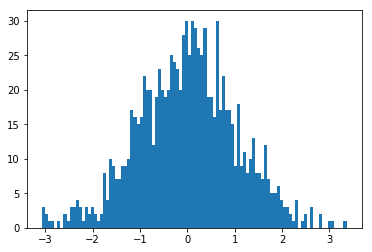

In [64]:
y = np.random.randn(1000)
plt.hist(y,bins=100,cumulative=False)
plt.show()

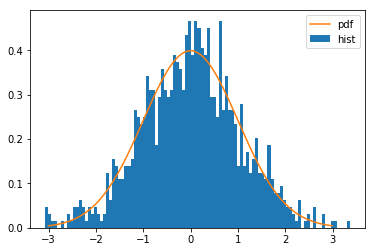

In [65]:
x = np.arange(-3,3,0.01)
y2 = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.hist(y,bins=100,cumulative=False,density=True,label='hist')
plt.plot(x,y2,label='pdf')
plt.legend()
plt.show()

* 5.4. Heatmap
    * Example: Faked movie rating data

In [66]:
import random
movies = ['Avatar','Pirates of the Caribbean','Star Wars','Spider-Man','The Avengers']
users = [''.join(random.sample('abcdefghijklmnopqrstuvwxyz',5)) for i in range(5)]
ratings = np.array([
    random.sample(np.arange(1,5,0.5).tolist(),5)
    for i in range(5)
])
ratings[:2,]

array([[4. , 3. , 4.5, 1.5, 2. ],
       [4. , 1.5, 1. , 3. , 4.5]])

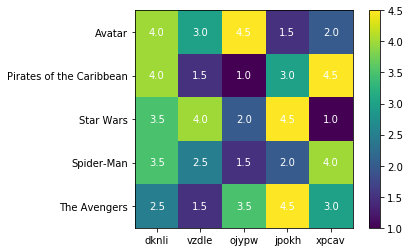

In [67]:
plt.imshow(ratings)

for i in range(len(users)):
    for j in range(len(movies)):
        plt.text(j, i, ratings[i, j],
                       ha="center", va="center", color="w")

plt.xticks(range(5),users)
plt.yticks(range(5),movies)
plt.colorbar()
plt.show()

* 5.5. Visualization on geolocation map
    * Common tools
        * folium (https://github.com/python-visualization/folium)
        * gmplot (https://github.com/vgm64/gmplot)

In [68]:
import folium
georgia = [
    (34.992756,-85.625226),
    (30.721736,-84.926279),
    (30.589405,-81.492173),
    (32.016373,-80.817001),
    (34.992871,-83.101132),
    (34.992756,-85.625226)
]
m = folium.Map([30.909508, -84.355094], zoom_start=6, height='60%')
folium.PolyLine(georgia).add_to(m)
m

In [69]:
locations = [
    (38.347, -77.488),
    (33.62, -84.499),
    (40.885999999999996, -81.566),
    (33.865, -117.84100000000001),
    (34.202, -118.402)
]
names = ['abc','def','ghi','jkl','mno']

m = folium.Map([34.909508, -89.355094], zoom_start=5, height='50%')

# mark all locations
for index,location in enumerate(locations):
    folium.Marker(
        [location[0], location[1]],
        popup=folium.Popup(names[index],parse_html=True),
        icon=folium.Icon(color='red')
    ).add_to(m)
m

## 6. Model Fitting Examples

* 6.1. Linear Regression (diabetes data)
    ![title](../pics/diabetes_data.png)

In [70]:
from sklearn import datasets

In [71]:
diabetes = datasets.load_diabetes()
# diabetes

In [72]:
# type(diabetes['data'])
diabetes['data'].shape

(442, 10)

In [73]:
diabetes['target'].shape

(442,)

In [74]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [75]:
import pandas as pd

df = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
df['target'] = diabetes['target']
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [76]:
# df.corr()

In [77]:
df_x = df.loc[:,['bmi']]
df_y = df.loc[:,'target']

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [80]:
lr.fit(x_train,y_train)
lr.coef_, lr.intercept_

(array([958.96106016]), 153.34795164225818)

In [81]:
lr.score(x_train,y_train) # R2 value

0.3581576077019467

In [82]:
import numpy as np
y_test_hat = lr.predict(x_test)
MSE = np.mean((y_test_hat-y_test)**2)
R2 = lr.score(x_test,y_test)
print('''
MSE:{}
R2:{}
'''.format(MSE,R2))


MSE:4113.813814261836
R2:0.3082201463223284



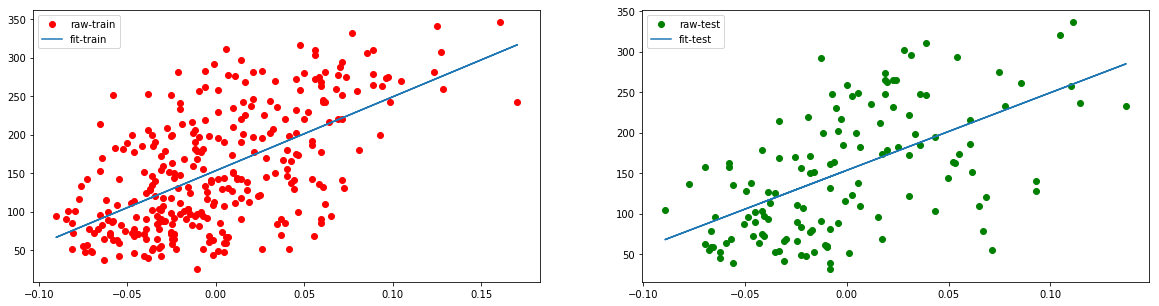

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(x_train['bmi'],y_train,'ro',label='raw-train')
plt.plot(x_train['bmi'],lr.predict(x_train),label='fit-train')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x_test['bmi'],y_test,'go',label='raw-test')
plt.plot(x_test['bmi'],y_test_hat,label='fit-test')
plt.legend()
plt.show()

* 6.2. k-Means (Iris dataset)
    ![title](../pics/iris_data.png)

In [84]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
iris = datasets.load_iris()

In [85]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [86]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [87]:
iris['data'][:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [88]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

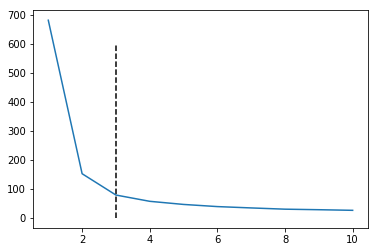

In [89]:
from sklearn.cluster import KMeans

withincluster_ssd = []
## use elbow plot to determine the ideal number of clusters
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(iris['data'])
    withincluster_ssd.append(km.inertia_)
## generate the elbow plot
plt.plot(list(range(1,11)),withincluster_ssd)
plt.vlines(x=3,ymin=0,ymax=600,linestyles='dashed')
plt.show()

In [90]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(iris['data']) #setosa,versicolor,virginica

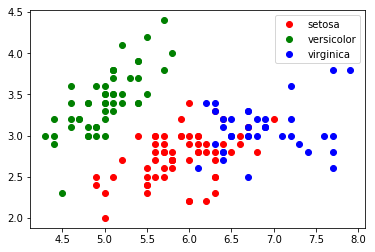

In [91]:
#Visualise the cluster distribution
index_x = 0
index_y = 1
setosa = [iris['data'][y_kmeans==0,index_x],iris['data'][y_kmeans==0,index_y]]
versicolor = [iris['data'][y_kmeans==1,index_x],iris['data'][y_kmeans==1,index_y]]
virginica = [iris['data'][y_kmeans==2,index_x],iris['data'][y_kmeans==2,index_y]]
plt.plot(setosa[0],setosa[1],'ro',label='setosa')
plt.plot(versicolor[0],versicolor[1],'go',label='versicolor')
plt.plot(virginica[0],virginica[1],'bo',label='virginica')
plt.legend()
plt.show()

<center>Thank You!</center>